In [34]:
# links Code use: https://github.com/navydhara79/Face-Recognition-using-eigen-faces/blob/main/face_recognition.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install bunch

  Preparing metadata (setup.py) ... done
  Created wheel for bunch: filename=bunch-1.0.1-py3-none-any.whl size=7075 sha256=68b0935c87ca30a54fa220ef249fc3c13d62ab4a82ea82d17bf94aead17e5abf
  Stored in directory: /root/.cache/pip/wheels/b8/a9/fe/1ab6d927c80327a67fddb03d620f77b8168c0f6caaac3a5271
Successfully built bunch


In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im

In [ ]:
import os
import cv2
import shutil

input_directory = '/content/drive/MyDrive/DataSet/Eigenfaces/Train'
output_directory = '/content/drive/MyDrive/DataSet/Eigenfaces/Test'

files = os.listdir(input_directory)
image_files = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
os.makedirs(output_directory, exist_ok=True)
index = 0
for image_file in image_files:
    input_image_path = os.path.join(input_directory, image_file)
    output_image_path = os.path.join(output_directory, str(index) +'a.jpg')
    index += 1
    image = cv2.imread(input_image_path)
    shutil.copy(input_image_path, output_image_path)

print(f"All images copied from {input_directory} to {output_directory}")

print('total files is: ' + str(index))

All images copied from /content/drive/MyDrive/DataSet/Eigenfaces/Train to /content/drive/MyDrive/DataSet/Eigenfaces/Test
total files is: 88


In [ ]:
neutral = []

for i in range(index):
    img = im.open(f'/content/drive/MyDrive/DataSet/Eigenfaces/Test/{i}a.jpg').convert('L')
    img = img.resize((58,49), im.ANTIALIAS)
    img2 = np.array(img).flatten() # vectorization
    neutral.append(img2)

<ipython-input-24-ba7b3517d88f>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((58,49), im.ANTIALIAS)


In [ ]:
faces_matrix = np.vstack(neutral)
faces_matrix.shape

(88, 2842)

In [ ]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape

(2842,)

(88, 2842)

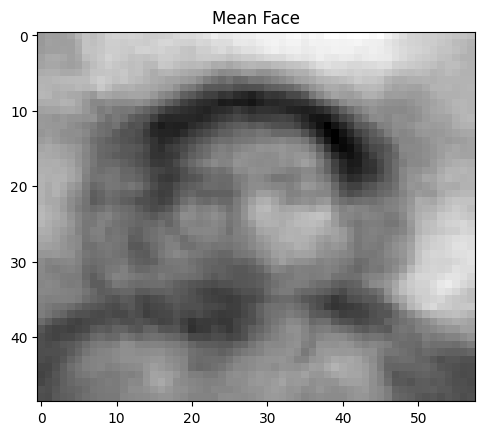

In [ ]:
plt.imshow(mean_face.reshape(49,58),cmap='gray');
plt.title('Mean Face')

faces_norm = faces_matrix - mean_face
faces_norm.shape

In [ ]:
# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(2842, 2842)

In [ ]:
# To get eigenvectors.
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(2842, 2842)

<ipython-input-30-b4dd98e2278d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2,5,i+1)


Text(0.5, 0.98, 'First 10 Eigenfaces')

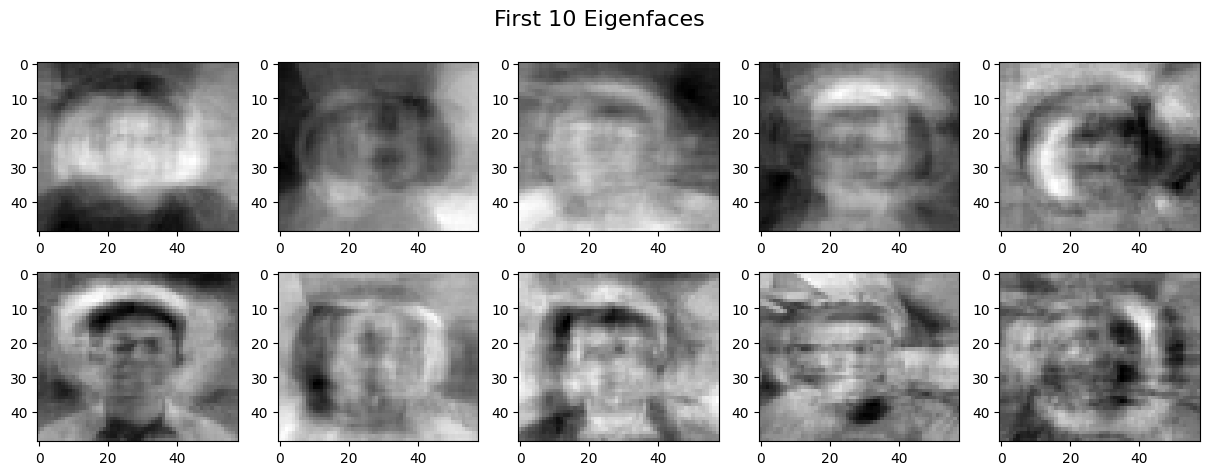

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(49,58)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

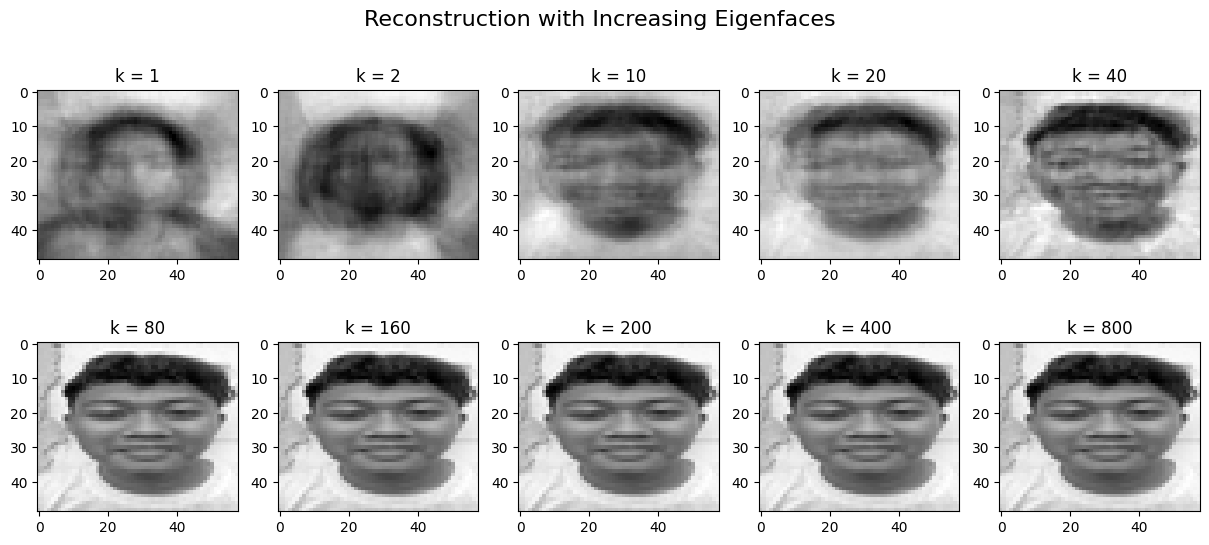

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[0,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(49,58)+mean_face.reshape(49,58),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);

In [ ]:
!zip -r /content/drive/MyDrive/DataSet/Eigenfaces.zip /content/drive/MyDrive/DataSet/Eigenfaces


  adding: content/drive/MyDrive/DataSet/Eigenfaces/ (stored 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/ (stored 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Ashim.jpg (deflated 3%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Ulin5.jpg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Nawawi6.jpg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Afifi9.jpg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Taufiq3.jpg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Chakim9.jpeg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Ulin3.jpg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Nadif3.jpg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Baiquni1.jpg (deflated 2%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Agna8.jpg (deflated 0%)
  adding: content/drive/MyDrive/DataSet/Eigenfaces/Val/Chakim1.jpe